In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
%cd drive/My\ Drive

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs = 32

In [0]:
path_img = Path('Final_rgdata')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2024 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: Final_rgdata;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: Final_rgdata;

Test: None

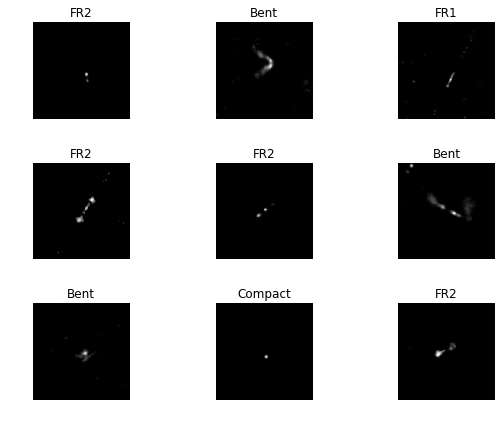

In [0]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Bent', 'Compact', 'FR1', 'FR2']


(4, 4)

In [0]:
learn = create_cnn(data, models.densenet169, metrics=error_rate)

In [0]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.137860,0.713670,0.270000,00:27
1,0.876911,0.522155,0.202500,00:24
2,0.783907,0.417516,0.150000,00:24
3,0.651107,0.386889,0.130000,00:23
4,0.564212,0.426252,0.162500,00:23
5,0.518631,0.342027,0.127500,00:23
6,0.466066,0.295791,0.112500,00:24
7,0.413024,0.282216,0.095000,00:24
8,0.372241,0.217610,0.067500,00:24
9,0.328494,0.203829,0.077500,00:24


In [0]:
learn.save('Final_d169')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

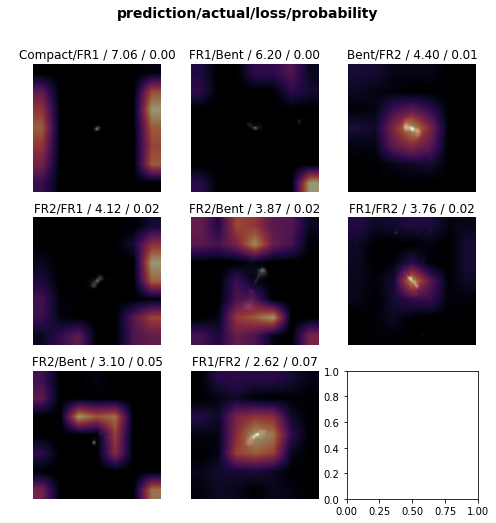

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

In [0]:
interp.most_confused(min_val=2)

[('Bent', 'FR2', 4),
 ('Bent', 'FR1', 3),
 ('FR1', 'FR2', 3),
 ('FR2', 'Bent', 2),
 ('FR2', 'FR1', 2)]

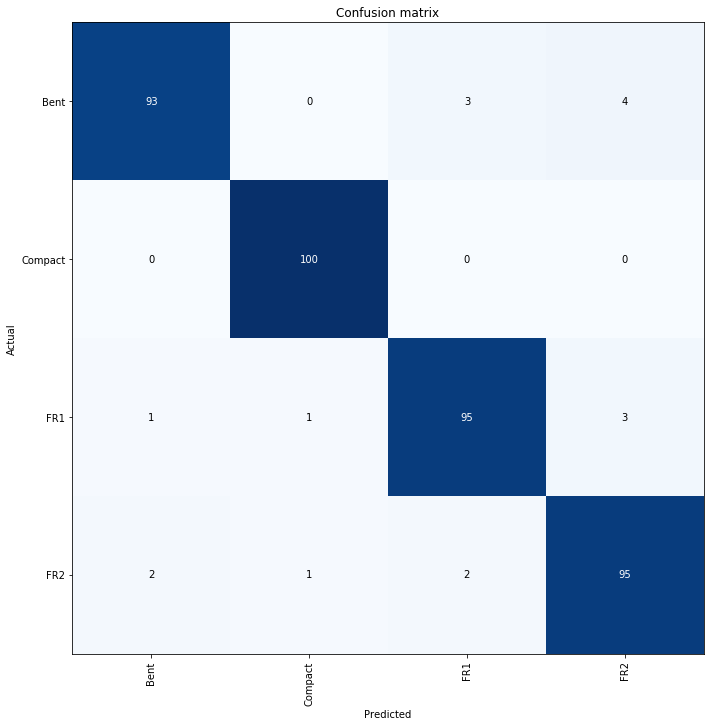

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
learn.export('Final_d169.pkl')

In [0]:
img = open_image('Final_rgdata/test/Bent/J003113.86+001236.2.jpeg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


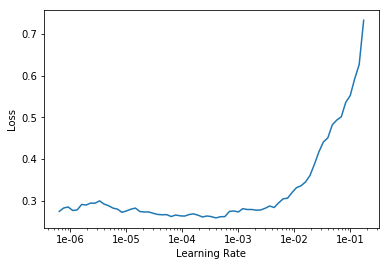

In [0]:
#Optional : To optimize the model and tweak more freely

learn.lr_find()
learn.recorder.plot()

#modify the layers
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [0]:
#Testing the model

path_img = Path('Final_rgdata')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2024 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: Final_rgdata;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: Final_rgdata;

Test: None

In [0]:
learn = create_cnn(data, models.densenet169, metrics=error_rate)

In [0]:
learn = learn.load('Final_d169')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

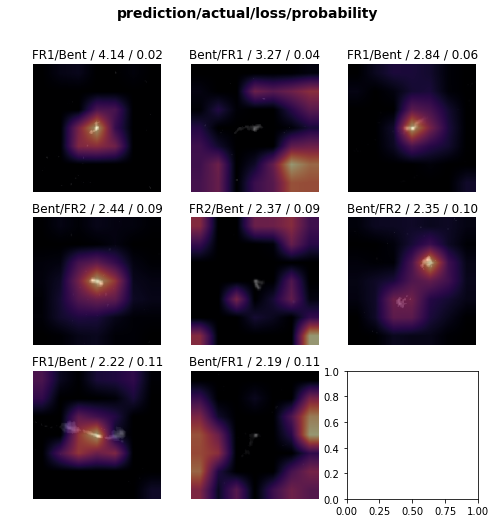

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

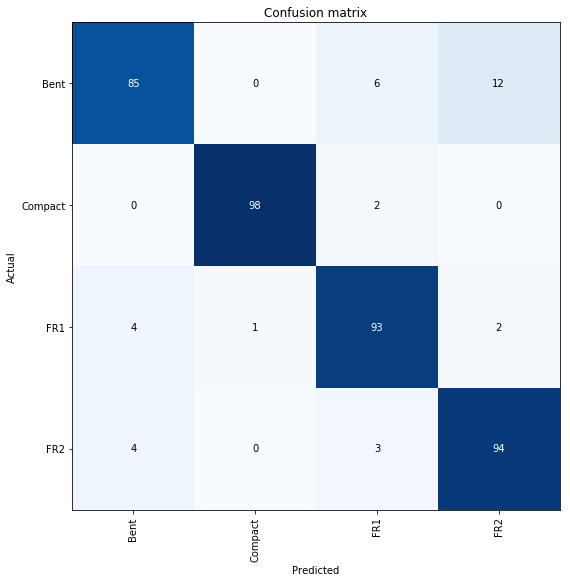

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
interp.most_confused(min_val=2)

[('Bent', 'FR2', 12),
 ('Bent', 'FR1', 6),
 ('FR1', 'Bent', 4),
 ('FR2', 'Bent', 4),
 ('FR2', 'FR1', 3),
 ('Compact', 'FR1', 2),
 ('FR1', 'FR2', 2)]

In [0]:
learn.export('Final_d169.pkl')